In [514]:
import pandas as pd

In [515]:
train = pd.read_csv('train.csv', index_col= 'Id')
test = pd.read_csv('test.csv', index_col= 'Id')

In [516]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000000
2,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000000
3,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000000
4,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.599579
5,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000000


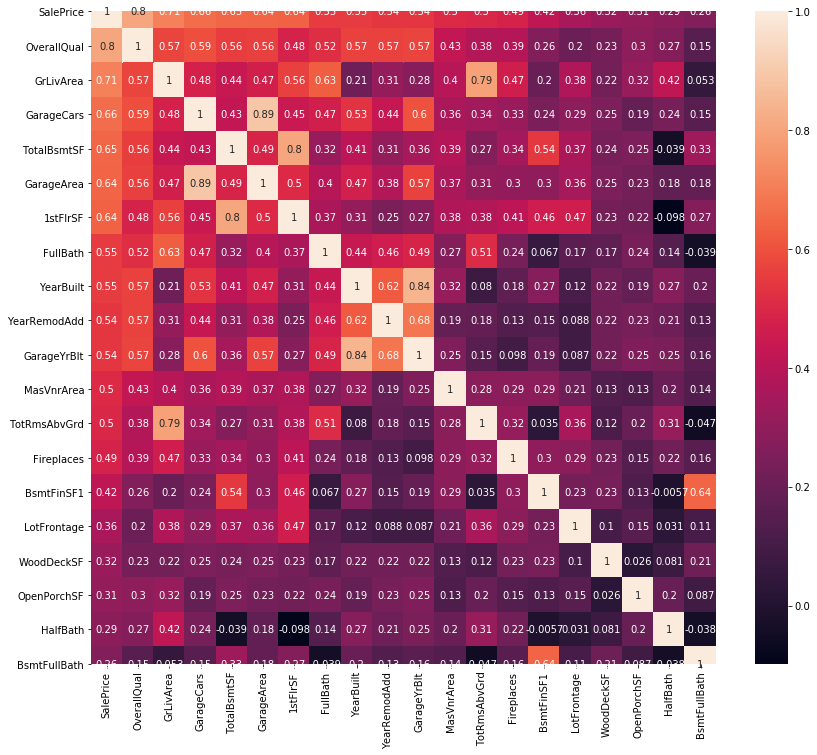

In [501]:
cor = train.corr() #corr()함수로 훈련데이터셋 내 모든 변수들의 상관관계 확인
top_corr = train[cor.nlargest(20,'SalePrice')['SalePrice'].index].corr() #타켓과 상관관계 큰 값의 인덱스를 차례로 40개 저장
plt.figure(figsize = (14,12))
sns.heatmap(top_corr, annot = True)

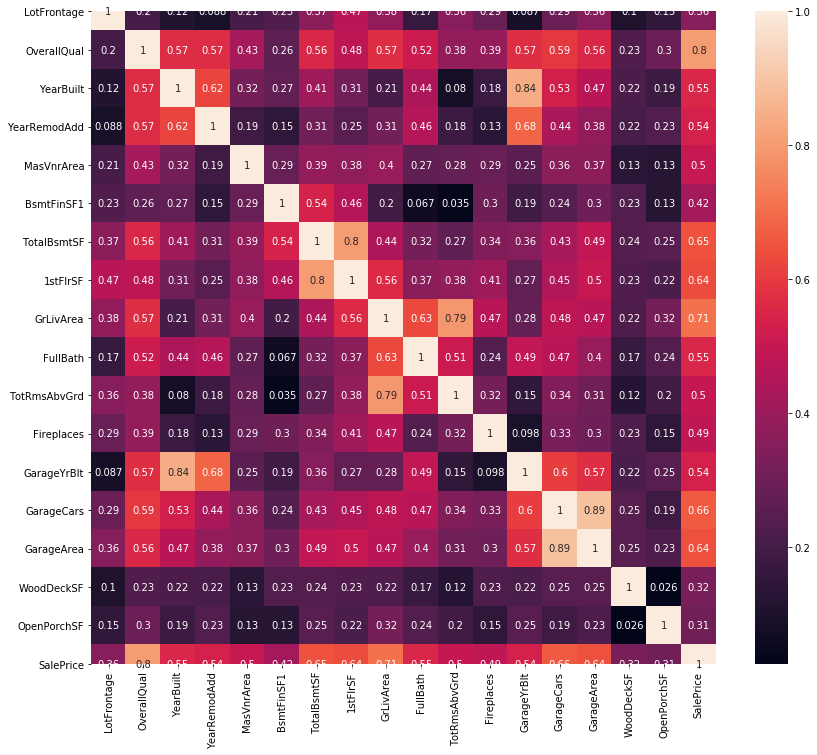

In [502]:
# corr()함수를 통한 df내 모든 변수의상관관계 그린 후 상관관계가 0.3이상인 변수만..
corrmat = train.corr() #상관관계 확인
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr_features

#위룰 토대로 heatmap 출력
plt.figure(figsize = (14,12))
sns.heatmap(train[top_corr_features].corr(), annot = True) #annot=True 각 셀안에 값 출력

In [503]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1752,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
1753,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1754,60,RL,NaN,9930,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1755,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1756,50,RL,66.0,21780,Pave,NaN,Reg,Lvl,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [504]:
#정답데이터 저장
y = train['SalePrice'] 

In [505]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 1751
Data columns (total 80 columns):
MSSubClass       1751 non-null int64
MSZoning         1747 non-null object
LotFrontage      1450 non-null float64
LotArea          1751 non-null int64
Street           1751 non-null object
Alley            125 non-null object
LotShape         1751 non-null object
LandContour      1751 non-null object
Utilities        1750 non-null object
LotConfig        1751 non-null object
LandSlope        1751 non-null object
Neighborhood     1751 non-null object
Condition1       1751 non-null object
Condition2       1751 non-null object
BldgType         1751 non-null object
HouseStyle       1751 non-null object
OverallQual      1751 non-null int64
OverallCond      1751 non-null int64
YearBuilt        1751 non-null int64
YearRemodAdd     1751 non-null int64
RoofStyle        1751 non-null object
RoofMatl         1751 non-null object
Exterior1st      1751 non-null object
Exterior2nd      1751 non

In [506]:
#train, test 합병
data = pd.concat((train,test))
data.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,1680,0,182,NaN,3,1Fam,TA,No,808.0,0.0,...,WD,0,Pave,5,880.0,AllPub,292,1988,2007,2009
2,981,0,0,NaN,3,1Fam,TA,No,282.0,35.0,...,WD,0,Pave,5,981.0,AllPub,0,1971,1971,2007
3,1494,0,0,NaN,3,1Fam,TA,Mn,922.0,0.0,...,WD,0,Pave,6,1494.0,AllPub,192,2002,2002,2008
4,854,840,0,Pave,3,1Fam,TA,No,0.0,0.0,...,WD,110,Pave,6,569.0,AllPub,0,1997,1998,2006
5,1721,0,0,NaN,3,1Fam,TA,No,570.0,0.0,...,WD,0,Pave,7,1461.0,AllPub,0,1968,1993,2006


In [507]:
del data['SalePrice']

#### 상관관계 낮은 컬럼 (0.1이하)

BsmtHalfBath    -0.030887
MiscVal         -0.016499
YrSold          -0.013871
BsmtFinSF2       0.001869
MoSold           0.038703
3SsnPorch        0.064808
PoolArea         0.075791

del data['MiscVal'], data['YrSold'], data['BsmtFinSF2'],  data['BsmtHalfBath'], data['LowQualFinSF'], \
data['MoSold'], data['3SsnPorch']

In [ ]:
data.info()

In [ ]:
data.shape

## 결측치 채우기

채워줘야 할 컬럼들
<br> 1   MSZoning       2915 non-null   object 
<br> 2   LotFrontage    2433 non-null   float64
<br> 5   Alley          198 non-null    object 
<br> 8   Utilities      2917 non-null   object 
<br> 22  Exterior1st    2918 non-null   object 
<br> 23  Exterior2nd    2918 non-null   object 
<br> 24  MasVnrType     2895 non-null   object 
<br> 25  MasVnrArea     2896 non-null   float64 
<br> 29  BsmtQual       2838 non-null   object 
<br> 30  BsmtCond       2837 non-null   object 
<br> 31  BsmtExposure   2837 non-null   object 
<br> 32  BsmtFinType1   2840 non-null   object 
<br> 33  BsmtFinSF1     2918 non-null   float64
<br> 34  BsmtFinType2   2839 non-null   object 
<br> 35  BsmtFinSF2     2918 non-null   float64
<br> 36  BsmtUnfSF      2918 non-null   float64
<br> 37  TotalBsmtSF    2918 non-null   float64
<br> 41  Electrical     2918 non-null   object 
<br> 46  BsmtFullBath   2917 non-null   float64
<br> 47  BsmtHalfBath   2917 non-null   float64
<br> 52  KitchenQual    2918 non-null   object 
<br> 54  Functional     2917 non-null   object 
<br> 56  FireplaceQu    1499 non-null   object 
<br> 57  GarageType     2762 non-null   object 
<br> 58  GarageYrBlt    2760 non-null   float64
<br> 59  GarageFinish   2760 non-null   object 
<br> 60  GarageCars     2918 non-null   float64
<br> 61  GarageArea     2918 non-null   float64
<br> 62  GarageQual     2760 non-null   object 
<br> 63  GarageCond     2760 non-null   object 
<br> 71  PoolQC         10 non-null     object 
<br> 72  Fence          571 non-null    object 
<br> 73  MiscFeature    105 non-null    object 
<br> 77  SaleType       2918 non-null   object 

In [ ]:
data.isnull().sum()

### 1. MSZoning

In [333]:
data['MSZoning'].isnull().sum()

4

In [334]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [335]:
##최빈값으로 채움
data['MSZoning'].fillna('RL',inplace=True)

### 2. LotFrontage

In [336]:
data['LotFrontage'].isnull().sum()

486

In [337]:
data['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
144.0      1
31.0       1
152.0      1
168.0      1
133.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [338]:
data['LotFrontage'].describe() #수치형 데이터

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [339]:
##평균값으로 채움
data['LotFrontage'].fillna(69,inplace=True)

### 3. Alley

In [340]:
data['Alley'].isnull().sum()

2721

In [341]:
data['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [342]:
data['Alley'].head()

Id
1     NaN
2     NaN
3     NaN
4    Pave
5     NaN
Name: Alley, dtype: object

In [343]:
##NA --> no alley access 므로 None으로 채움
data['Alley'].fillna('None',inplace=True)

### 4. Utilities

In [344]:
data['Utilities'].isnull().sum()

2

In [345]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [346]:
##최빈값으로
data['Utilities'].fillna('AllPub',inplace=True)

### 5. Exterior1st, Exterior2nd

In [347]:
data['Exterior1st'].isnull().sum()

1

In [348]:
data['Exterior2nd'].isnull().sum()

1

In [349]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [350]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [351]:
data[data['Exterior1st'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
2505,1518,0,0,None,2,1Fam,TA,Gd,1035.0,0.0,...,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


In [352]:
##최빈값으로
data['Exterior1st'].fillna('VinylSd',inplace=True)
data['Exterior2nd'].fillna('VinylSd',inplace=True)

### 6. MasVnrType , MasVnrArea 

In [353]:
data['MasVnrType'].isnull().sum()

24

In [354]:
data['MasVnrArea'].isnull().sum()

23

In [355]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [356]:
data['MasVnrArea'].value_counts()

0.0       1738
120.0       15
200.0       13
176.0       13
180.0       12
          ... 
381.0        1
235.0        1
175.0        1
207.0        1
1031.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [357]:
data['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [358]:
data[data['MasVnrType'].isnull()]['MasVnrArea'] #type이 널이면 area도 널

Id
13        NaN
263       NaN
427       NaN
613       NaN
619     198.0
649       NaN
679       NaN
720       NaN
866       NaN
946       NaN
947       NaN
1028      NaN
1198      NaN
1310      NaN
1507      NaN
1537      NaN
1611      NaN
2050      NaN
2054      NaN
2195      NaN
2208      NaN
2311      NaN
2428      NaN
2474      NaN
Name: MasVnrArea, dtype: float64

In [359]:
data['MasVnrType'].fillna('None',inplace=True)
data['MasVnrArea'].fillna(0,inplace=True)

### 7. BsmtQual, BsmtCond ,BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, ,BsmtUnfSF, TotalBsmtSF, BsmtFullBath', 'BsmtHalfBath'

In [361]:
data['BsmtQual'].isnull().sum()

81

In [362]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [363]:
data['BsmtCond'].isnull().sum()

82

In [364]:
data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [365]:
#BsmtQual, BsmtCond 의 NA == no basement! : None으로 채움
data['BsmtQual'].fillna('None', inplace = True)
data['BsmtCond'].fillna('None', inplace = True)

In [367]:
#NA	No Basement == None
data['BsmtExposure'].value_counts()
data['BsmtExposure'].fillna('None', inplace = True)

In [368]:
data['BsmtFinType1'].fillna('None',inplace=True)
data['BsmtFinType2'].fillna('None',inplace=True)

In [ ]:
data['BsmtHalfBath'].value_counts()
data['BsmtHalfBath'].fillna(0,inplace=True)

In [369]:
data['BsmtFullBath'].value_counts()
data['BsmtFullBath'].fillna(0,inplace=True)

In [370]:
data['BsmtFinSF1'].describe()
data['BsmtFinSF1'].fillna(0,inplace=True)
data['BsmtFinSF2'].fillna(0,inplace=True)

In [371]:
data['BsmtUnfSF'].value_counts()
data['BsmtUnfSF'].fillna(0,inplace=True)

In [372]:
data['TotalBsmtSF'].value_counts()
data['TotalBsmtSF'].fillna(0,inplace=True)

### 8. Electrical

In [373]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [374]:
data['Electrical'].fillna('SBrkr',inplace=True)

### 9. KitchenQual

In [375]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [376]:
data[data['KitchenQual'].isnull()]['KitchenAbvGr']

Id
1794    1
Name: KitchenAbvGr, dtype: int64

In [377]:
data['KitchenQual'].fillna('TA',inplace=True)

### 10. Functional

In [378]:
data['Functional'].isnull().sum()

2

In [379]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [380]:
data['Functional'].fillna('Typ',inplace=True)

### 11. FireplaceQu

In [381]:
data['FireplaceQu'].isnull().sum()

1420

In [382]:
data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [383]:
## NA	No Fireplace
data['FireplaceQu'].fillna('None',inplace=True)

### 12. GarageType ,GarageYrBlt 2, GarageFinish, GarageCars , GarageArea , GarageQual , GarageCond 

In [384]:
data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [385]:
## NA	No Gararge
data['GarageType'].fillna('None',inplace=True)
data['GarageFinish'].fillna('None',inplace=True)
data['GarageQual'].fillna('None',inplace=True)
data['GarageCond'].fillna('None',inplace=True)

In [386]:
data['GarageArea'].fillna(0,inplace=True)
data['GarageCars'].fillna(0,inplace=True)
data['GarageYrBlt'].fillna(0,inplace=True)

### 13. PoolQC

In [387]:
data['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [388]:
# NA	No Pool
data['PoolQC'].fillna('None',inplace=True)

### 14. Fence

In [389]:
# NA	No Fence
data['Fence'].fillna('None',inplace=True)

### 15. MiscFeature

In [390]:
data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [391]:
# NA	None
data['MiscFeature'].fillna('None', inplace = True)

### 16. SaleType

In [392]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [393]:
data['SaleType'].isnull().sum()

1

In [394]:
data['SaleType'].fillna('WD', inplace = True)

In [395]:
data.isnull().sum().sum() #결측치 다 채워졌는지 확인~~

3

### 컬럼새로 만들기 및 수정

#### 1. MSSubclass

In [396]:
#MSSubClass str로
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [397]:
data['MSSubClass'].describe()

count     2919
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: object

#### 2. Street

In [398]:
data['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [399]:
data['Street'] = data['Street'].map({'Pave' : 0, 'Grvl' : 1})

#### 3. OverallQual/OverallCond

In [400]:
data['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

In [401]:
data['OverallCond'].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [402]:
data['OverallQual*Cond'] = data["OverallQual"] * data["OverallCond"]

In [403]:
# OverallQual 
bins = [0, 2 , 4, 6, 8, 10] 
labels = ['Po', 'Fa', 'TA', 'Gd',' EX']
data['OverallQualBins'] = pd.cut(data['OverallQual'],bins = bins, labels = labels)
del data['OverallQual'] #상관관계 너무 높은 컬럼은 지우는게 나을수도 ?
# OverallCond
bins = [0, 2 , 4, 6, 8, 10] 
labels = ['Po', 'Fa', 'TA', 'Gd',' EX']
data['OverallCondBins'] = pd.cut(data['OverallCond'],bins = bins, labels = labels)

#### 4. Utilities

In [404]:
data['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [405]:
##거의 같은 값 --> 의미 X 컬럼 삭제
del data['Utilities']

#### 5. YearBuilt/YearRemodAdd

In [406]:
data['YearBuilt'].value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

In [407]:
data['YearRemodAdd'].value_counts()

1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

In [408]:
data['TotalYear']=data['YearBuilt']+data['YearRemodAdd']

In [409]:
# YearRemodAdd 
bins = [0, 1970, 1990, 2000, 2005, 2010] 
labels = ['Very Old', 'Old', 'Little Old', 'Normal', 'New']
data['YearRemodAddBins'] = pd.cut(data['YearRemodAdd'],bins = bins, labels = labels)

# YearBuilt
bins = [0, 1900, 1960, 1975, 2000, 2010] 
labels = ['Very Old', 'Old', 'Little Old', 'Normal', 'New']
data['YearBuiltBins'] = pd.cut(data['YearRemodAdd'],bins = bins, labels = labels)

#### 6. MasVnrType/MasVnrArea

In [410]:
data['MasVnrType'].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [411]:
#시설 유무 여부로 0,1 구분
data['hasMasVnr'] = data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)

In [412]:
data['hasMasVnr'].value_counts()

0    1761
1    1158
Name: hasMasVnr, dtype: int64

#### 7. ExterQual, ExterCond

In [413]:
data['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [414]:
data['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [415]:
data['ExterQual'] = data['ExterQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1})
data['ExterCond'] = data['ExterCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1})

In [416]:
data['ExterQual*ExterCond'] = data["ExterQual"] * data["ExterCond"]

#### 8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 , BsmtFinType2, BsmtFinSF2, </n>BsmtUnfSF, TotalBsmtSF

In [417]:
data['BsmtQual'].value_counts()

TA      1283
Gd      1209
Ex       258
Fa        88
None      81
Name: BsmtQual, dtype: int64

In [418]:
data['BsmtQual'] = data['BsmtQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'None' : 0})
data['BsmtCond'] = data['BsmtCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'None' : 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd' : 4, 'Av' : 3, 'Mn' :2, 'No' :1, 'None' : 0})

In [419]:
data['BsmtQual*Cond*Expo'] = data["BsmtQual"] * data["BsmtCond"] * data['BsmtExposure']

In [420]:
for i in range(1,len(data)) :
    if data['BsmtQual'][i] == 0 : data['BsmtCond'][i] = 0
    elif data['BsmtCond'][i] == 0 : data['BsmtQual'][i] = 0

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [421]:
data[data['BsmtQual']==0]['BsmtCond'].value_counts()

0    84
Name: BsmtCond, dtype: int64

In [422]:
#시설 유무 여부로 0,1 구분
data['hasBsmt'] = data['BsmtCond'].apply(lambda x: 1 if x > 0 else 0)

In [423]:
data['BsmtFinType1'].value_counts()

Unf     851
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64

In [424]:
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'ALQ': 4, 'Rec' : 3, \
                                                 'LwQ' : 2, 'Unf' : 1, 'None' : 0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'ALQ': 4, 'Rec' : 3, \
                                                 'LwQ' : 2, 'Unf' : 1, 'None' : 0})

In [425]:
data['BsmtFinType1*Type2'] = data["BsmtFinType1"] * data["BsmtFinType2"]

In [426]:
data['TotalBsmtSF'] #data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF']

Id
1        880.0
2        981.0
3       1494.0
4        569.0
5       1461.0
         ...  
2915    1120.0
2916     629.0
2917    1143.0
2918     923.0
2919     876.0
Name: TotalBsmtSF, Length: 2919, dtype: float64

In [427]:
# TotalBsmtSF 
bins = [-1, 0, 600, 800 , 1000 , 1400, 1800, 2500, 6200] 
labels = ['0','1','2','3','4','5','6','7']
data['TotalBsmtSFBins'] = pd.cut(data['TotalBsmtSF'],bins = bins, labels = labels)

data['TotalBsmtSFBins'].value_counts()


4    855
3    729
2    469
5    440
1    216
6    118
0     79
7     13
Name: TotalBsmtSFBins, dtype: int64

#### 9. CentralAir

In [428]:
data['CentralAir'] = data['CentralAir'].map({'N' : 0, 'Y' : 1})
data['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

#### 10. 1stFlrSF , 2ndFlrSF

In [429]:
data['TotalFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
data['TotalSF'] =  (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])

In [430]:
# 1stFlrSF
bins = [0, 500, 900 , 1100 , 1400, 2500, 5100] 
labels = ['1', '2', '3', '4', '5', '6']
data['1stFlrSFBins'] = pd.cut(data['1stFlrSF'],bins = bins, labels = labels)

# 2ndFlrSF
bins = [-1,0, 500, 1000, 1500, 2100] 
labels = ['0', '1', '2', '3', '4']
data['2ndFlrSFBins'] = pd.cut(data['2ndFlrSF'],bins = bins, labels = labels)

In [431]:
data['2ndFlrSFBins'].value_counts()

0    1668
2     874
3     210
1     146
4      21
Name: 2ndFlrSFBins, dtype: int64

#### 11. BsmtFullBath, BsmtHalfBath, FullBath, HalfBath

In [432]:
data['TotalBsmtBath'] = data['BsmtFullBath'] + data['BsmtHalfBath'] * 0.5
data['TotalBath'] = data['FullBath'] + data['HalfBath'] * 0.5 + data['BsmtFullBath'] + data['BsmtHalfBath'] * 0.5

#### 12. Bedroom, Kitchen, KitchenQual

In [433]:
data['BedroomAbvGr'].value_counts()
bins = [-1,2,5,8] 
labels = ['Fa','TA','Gd']
data['BedroomGrade'] = pd.cut(data['BedroomAbvGr'],bins = bins, labels = labels)

In [434]:
data['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [435]:
data['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [436]:
data['TotRmsAbvGrd'].value_counts()
bins = [0,4,7,10,15] 
labels = ['Po','TA','Gd','Ex']
data['TotalRoomGrade'] = pd.cut(data['TotRmsAbvGrd'],bins = bins, labels = labels)

In [437]:
data['TotalRoomGrade'].value_counts()

TA    2076
Gd     570
Po     222
Ex      51
Name: TotalRoomGrade, dtype: int64

#### 13. Fireplaces

In [438]:
data['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [439]:
#시설 유무 여부로 0,1 구분
data['hasFireplaces'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [440]:
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'None' : 0})
data['FireplaceGrade'] = data['Fireplaces'] * data['FireplaceQu']
data['FireplaceGrade'].value_counts()

0     1420
4      637
3      495
8      112
6       93
2       63
1       46
5       37
12       6
10       5
9        4
15       1
Name: FireplaceGrade, dtype: int64

#### 14. Garage

In [441]:
data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [442]:
data[data['GarageArea']==0]['GarageQual'].value_counts()

None    158
Name: GarageQual, dtype: int64

In [443]:
#시설 유무 여부로 0,1 구분
data['hasGarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [444]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     158
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [445]:
data['GarageQual'] = data['GarageQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'None' : 0})
data['GarageCond'] = data['GarageCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'None' : 0})
data['GarageGrade'] = data['GarageQual'] * data['GarageCond'] * data['GarageCars']

In [446]:
# GarageArea 
bins = [-1, 0, 350, 500, 600, 1000, 1500] 
labels = ['0','1','2','3','4','5']
data['GarageAreaBins'] = pd.cut(data['GarageArea'],bins = bins, labels = labels)

#### 15. WoodDeckSF: OpenPorchSF: EnclosedPorch: 3SsnPorch: ScreenPorch: 

In [447]:
data['WoodDeckSF'].value_counts()
#시설 유무 여부로 0,1 구분
data['hasWoodDeckSF'] = data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [448]:
data['OpenPorchSF'].value_counts()
#시설 유무 여부로 0,1 구분
data['hasOpenPorchSF'] = data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

In [449]:
data['EnclosedPorch'].value_counts()
#시설 유무 여부로 0,1 구분
data['hasEnclosedPorch'] = data['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)

In [450]:
data['3SsnPorch'].value_counts()
#시설 유무 여부로 0,1 구분
data['has3SsnPorch'] = data['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)

In [451]:
data['ScreenPorch'].value_counts()
data['hasScreenPorch'] = data['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
data["AllPorchSF"] = data["OpenPorchSF"] + data["EnclosedPorch"] + data["3SsnPorch"] + data["ScreenPorch"] + data['WoodDeckSF']

#### 16. Pool

In [452]:
data['PoolArea'].value_counts()
data['hasPoolArea'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [453]:
data['PoolQC'] = data['PoolQC'].map({'Ex' : 4, 'Gd' : 3, 'TA' : 2 , 'Fa' : 1, 'None' : 0})
data['PoolGrade'] = data['PoolQC'] * data['PoolArea']

#### 17. Fence

In [454]:
data['Fence'].value_counts()
data['hasFence'] = 0
for i in range(1, len(data)) :
    if data['Fence'][i] == 'None' :
        data['hasFence'][i] = 0
    else :
        data['hasFence'][i] = 1
data['hasFence'].value_counts()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    2348
1     571
Name: hasFence, dtype: int64

#### 18. MiscFeature

In [455]:
data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [456]:
data['hasMiscFeature'] = 0
for i in range(1, len(data)) :
    if data['MiscFeature'][i] == 'None' :
        data['hasMiscFeature'][i] = 0
    else :
        data['hasMiscFeature'][i] = 1
data['hasMiscFeature'].value_counts()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    2814
1     105
Name: hasMiscFeature, dtype: int64

#### 19. MoSold, YrSold

In [457]:
train.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.143471
KitchenAbvGr    -0.121199
MSSubClass      -0.102403
OverallCond     -0.075580
LowQualFinSF    -0.045149
BsmtHalfBath    -0.030887
MiscVal         -0.016499
YrSold          -0.013871
BsmtFinSF2       0.001869
MoSold           0.038703
3SsnPorch        0.064808
PoolArea         0.075791
ScreenPorch      0.099102
BedroomAbvGr     0.151129
BsmtUnfSF        0.217641
2ndFlrSF         0.262407
LotArea          0.264751
BsmtFullBath     0.264883
HalfBath         0.288713
OpenPorchSF      0.307070
WoodDeckSF       0.324476
LotFrontage      0.358583
BsmtFinSF1       0.420841
Fireplaces       0.485241
TotRmsAbvGrd     0.498221
MasVnrArea       0.503970
GarageYrBlt      0.538430
YearRemodAdd     0.539269
YearBuilt        0.551999
FullBath         0.553401
1stFlrSF         0.637123
GarageArea       0.642899
TotalBsmtSF      0.647987
GarageCars       0.661647
GrLivArea        0.709685
OverallQual      0.803108
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [458]:
del data['MoSold'], data['YrSold'] #노쓸모 컬럼 드랍(상관관계 낮음)
del data['Utilities'] #대부분 같은값이라 의미없어서 컬럼 삭제

In [459]:
data.shape

(2919, 109)

In [460]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## 데이터 모델링

In [461]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from catboost import CatBoostRegressor

In [462]:
import winsound as sd 
def beepsound(): 
    fre = 2000
    du = 3000
    sd.Beep(fre, du)
    # range : 37 ~ 32767 du = 1000 # 1000 ms ==1second sd.Beep(fr, du)

In [463]:
#원핫인코딩
data = pd.get_dummies(data)
data.shape

(2919, 337)

In [464]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,TotalRoomGrade_Po,TotalRoomGrade_TA,TotalRoomGrade_Gd,TotalRoomGrade_Ex,GarageAreaBins_0,GarageAreaBins_1,GarageAreaBins_2,GarageAreaBins_3,GarageAreaBins_4,GarageAreaBins_5
Id,,,,,,,,,,,,,,,,,,,,,
1,1680,0,182,3,3,1,808.0,0.0,6.0,1.0,...,0,1,0,0,0,0,0,1,0,0
2,981,0,0,3,3,1,282.0,35.0,4.0,2.0,...,0,1,0,0,0,0,0,1,0,0
3,1494,0,0,3,3,2,922.0,0.0,6.0,1.0,...,0,1,0,0,0,0,0,1,0,0
4,854,840,0,3,3,1,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
5,1721,0,0,3,3,1,570.0,0.0,3.0,1.0,...,0,1,0,0,0,0,1,0,0,0


In [465]:
y

Id
1       222000.000000
2       143250.000000
3       221000.000000
4       190269.599579
5       180000.000000
            ...      
1747    231500.000000
1748    158900.000000
1749    280000.000000
1750    334400.985840
1751    172283.666694
Name: SalePrice, Length: 1751, dtype: float64

In [466]:
#트레인, 테스트 분리
train = data.iloc[:1751] 
test = data.iloc[1751:]
print(train.shape)
print(test.shape)
x = train

(1751, 337)
(1168, 337)


In [467]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7,test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1313, 337), (438, 337), (1313,), (438,))

### 특성 중요도 탐색

In [468]:
model = CatBoostRegressor(random_state=7, logging_level= 'Silent' )
model.fit(x_train, y_train)

features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = model.feature_importances_#feature별 가중치 크기
features['importance'].sort_values(ascending=True)

0:	learn: 75748.8630442	total: 152ms	remaining: 2m 31s
1:	learn: 74345.6962956	total: 161ms	remaining: 1m 20s
2:	learn: 72855.6977349	total: 170ms	remaining: 56.6s
3:	learn: 71411.4602624	total: 181ms	remaining: 45.2s
4:	learn: 69986.0519032	total: 192ms	remaining: 38.1s
5:	learn: 68644.4205366	total: 201ms	remaining: 33.3s
6:	learn: 67361.3222234	total: 210ms	remaining: 29.8s
7:	learn: 66172.5442884	total: 220ms	remaining: 27.2s
8:	learn: 64895.9604122	total: 229ms	remaining: 25.2s
9:	learn: 63657.1575462	total: 238ms	remaining: 23.6s
10:	learn: 62466.9273503	total: 247ms	remaining: 22.2s
11:	learn: 61339.0210768	total: 256ms	remaining: 21.1s
12:	learn: 60296.1333223	total: 265ms	remaining: 20.1s
13:	learn: 59212.3050262	total: 274ms	remaining: 19.3s
14:	learn: 58269.4184757	total: 283ms	remaining: 18.6s
15:	learn: 57275.5379981	total: 293ms	remaining: 18s
16:	learn: 56293.6928039	total: 302ms	remaining: 17.4s
17:	learn: 55254.8932357	total: 311ms	remaining: 16.9s
18:	learn: 54284.332

163:	learn: 17102.2280869	total: 1.93s	remaining: 9.82s
164:	learn: 17044.3873550	total: 1.94s	remaining: 9.81s
165:	learn: 17014.7092703	total: 1.95s	remaining: 9.79s
166:	learn: 16967.7316402	total: 1.96s	remaining: 9.78s
167:	learn: 16931.6964920	total: 1.97s	remaining: 9.76s
168:	learn: 16865.1730418	total: 1.98s	remaining: 9.74s
169:	learn: 16828.9904666	total: 1.99s	remaining: 9.71s
170:	learn: 16783.8284613	total: 2s	remaining: 9.7s
171:	learn: 16730.4320556	total: 2.01s	remaining: 9.69s
172:	learn: 16657.3930164	total: 2.02s	remaining: 9.67s
173:	learn: 16621.1248204	total: 2.04s	remaining: 9.66s
174:	learn: 16562.2326492	total: 2.05s	remaining: 9.65s
175:	learn: 16503.4974241	total: 2.06s	remaining: 9.63s
176:	learn: 16459.9665916	total: 2.07s	remaining: 9.63s
177:	learn: 16417.1965580	total: 2.08s	remaining: 9.61s
178:	learn: 16385.1334872	total: 2.09s	remaining: 9.59s
179:	learn: 16334.1290976	total: 2.1s	remaining: 9.59s
180:	learn: 16287.7571761	total: 2.12s	remaining: 9.5

326:	learn: 12165.0123211	total: 3.69s	remaining: 7.6s
327:	learn: 12141.7595460	total: 3.71s	remaining: 7.59s
328:	learn: 12125.8446567	total: 3.72s	remaining: 7.58s
329:	learn: 12096.0679627	total: 3.73s	remaining: 7.57s
330:	learn: 12071.9943322	total: 3.74s	remaining: 7.55s
331:	learn: 12056.3759140	total: 3.75s	remaining: 7.54s
332:	learn: 12037.4102479	total: 3.76s	remaining: 7.53s
333:	learn: 12016.1646497	total: 3.77s	remaining: 7.53s
334:	learn: 11994.4345650	total: 3.79s	remaining: 7.52s
335:	learn: 11971.8909968	total: 3.8s	remaining: 7.5s
336:	learn: 11956.4139341	total: 3.81s	remaining: 7.49s
337:	learn: 11931.3245448	total: 3.81s	remaining: 7.47s
338:	learn: 11925.0336457	total: 3.83s	remaining: 7.46s
339:	learn: 11911.1579362	total: 3.83s	remaining: 7.44s
340:	learn: 11886.7128040	total: 3.84s	remaining: 7.43s
341:	learn: 11868.8421446	total: 3.85s	remaining: 7.42s
342:	learn: 11851.6885643	total: 3.87s	remaining: 7.41s
343:	learn: 11825.9419350	total: 3.88s	remaining: 7

479:	learn: 9736.7429608	total: 5.28s	remaining: 5.72s
480:	learn: 9725.7257255	total: 5.29s	remaining: 5.71s
481:	learn: 9718.6525042	total: 5.31s	remaining: 5.7s
482:	learn: 9704.1278442	total: 5.32s	remaining: 5.69s
483:	learn: 9690.2623963	total: 5.33s	remaining: 5.68s
484:	learn: 9678.0768274	total: 5.34s	remaining: 5.67s
485:	learn: 9662.7024497	total: 5.35s	remaining: 5.65s
486:	learn: 9650.6268501	total: 5.36s	remaining: 5.64s
487:	learn: 9641.1574284	total: 5.36s	remaining: 5.63s
488:	learn: 9628.2163217	total: 5.37s	remaining: 5.62s
489:	learn: 9619.0263646	total: 5.38s	remaining: 5.6s
490:	learn: 9611.0242367	total: 5.39s	remaining: 5.59s
491:	learn: 9596.8450081	total: 5.4s	remaining: 5.58s
492:	learn: 9587.2074626	total: 5.41s	remaining: 5.56s
493:	learn: 9575.9314739	total: 5.42s	remaining: 5.55s
494:	learn: 9573.0322721	total: 5.43s	remaining: 5.54s
495:	learn: 9562.2871735	total: 5.44s	remaining: 5.52s
496:	learn: 9549.7376550	total: 5.45s	remaining: 5.51s
497:	learn: 9

631:	learn: 8221.1109456	total: 6.87s	remaining: 4s
632:	learn: 8219.5635624	total: 6.88s	remaining: 3.99s
633:	learn: 8208.6903439	total: 6.89s	remaining: 3.98s
634:	learn: 8197.1713042	total: 6.9s	remaining: 3.97s
635:	learn: 8195.2331269	total: 6.91s	remaining: 3.96s
636:	learn: 8189.3636097	total: 6.93s	remaining: 3.95s
637:	learn: 8188.0181548	total: 6.94s	remaining: 3.94s
638:	learn: 8178.3299656	total: 6.95s	remaining: 3.92s
639:	learn: 8170.4636783	total: 6.96s	remaining: 3.91s
640:	learn: 8160.9751059	total: 6.96s	remaining: 3.9s
641:	learn: 8155.1355068	total: 6.98s	remaining: 3.89s
642:	learn: 8143.9973511	total: 6.99s	remaining: 3.88s
643:	learn: 8135.6679627	total: 7s	remaining: 3.87s
644:	learn: 8120.6970873	total: 7.01s	remaining: 3.86s
645:	learn: 8113.1138223	total: 7.02s	remaining: 3.85s
646:	learn: 8105.1860756	total: 7.03s	remaining: 3.84s
647:	learn: 8097.9563325	total: 7.05s	remaining: 3.83s
648:	learn: 8091.6281810	total: 7.06s	remaining: 3.82s
649:	learn: 8083.2

785:	learn: 7142.6918032	total: 8.65s	remaining: 2.35s
786:	learn: 7137.2293325	total: 8.66s	remaining: 2.34s
787:	learn: 7130.1805161	total: 8.68s	remaining: 2.33s
788:	learn: 7125.1425529	total: 8.69s	remaining: 2.32s
789:	learn: 7114.1342715	total: 8.7s	remaining: 2.31s
790:	learn: 7109.1127188	total: 8.71s	remaining: 2.3s
791:	learn: 7100.7101830	total: 8.72s	remaining: 2.29s
792:	learn: 7094.8501045	total: 8.73s	remaining: 2.28s
793:	learn: 7089.5906702	total: 8.74s	remaining: 2.27s
794:	learn: 7079.8961752	total: 8.75s	remaining: 2.26s
795:	learn: 7074.9530133	total: 8.76s	remaining: 2.25s
796:	learn: 7064.4982983	total: 8.77s	remaining: 2.23s
797:	learn: 7055.3890419	total: 8.78s	remaining: 2.22s
798:	learn: 7052.7769220	total: 8.79s	remaining: 2.21s
799:	learn: 7047.4529943	total: 8.8s	remaining: 2.2s
800:	learn: 7040.5405557	total: 8.81s	remaining: 2.19s
801:	learn: 7034.7382462	total: 8.83s	remaining: 2.18s
802:	learn: 7026.8820195	total: 8.84s	remaining: 2.17s
803:	learn: 70

948:	learn: 6220.6070150	total: 10.5s	remaining: 562ms
949:	learn: 6216.2796616	total: 10.5s	remaining: 551ms
950:	learn: 6208.1415046	total: 10.5s	remaining: 540ms
951:	learn: 6207.5881537	total: 10.5s	remaining: 529ms
952:	learn: 6202.7035796	total: 10.5s	remaining: 518ms
953:	learn: 6195.9421895	total: 10.5s	remaining: 507ms
954:	learn: 6193.6017791	total: 10.5s	remaining: 496ms
955:	learn: 6188.2121729	total: 10.5s	remaining: 485ms
956:	learn: 6181.1298407	total: 10.5s	remaining: 474ms
957:	learn: 6177.3650854	total: 10.6s	remaining: 463ms
958:	learn: 6171.5068023	total: 10.6s	remaining: 452ms
959:	learn: 6164.7029557	total: 10.6s	remaining: 441ms
960:	learn: 6164.1455000	total: 10.6s	remaining: 429ms
961:	learn: 6162.9154077	total: 10.6s	remaining: 419ms
962:	learn: 6157.1867506	total: 10.6s	remaining: 408ms
963:	learn: 6150.3419536	total: 10.6s	remaining: 397ms
964:	learn: 6142.2209048	total: 10.6s	remaining: 386ms
965:	learn: 6136.1778219	total: 10.6s	remaining: 375ms
966:	learn

168    0.000000
138    0.000000
140    0.000000
144    0.000000
157    0.000000
         ...   
55     5.131394
46     5.392536
53     5.913062
17     7.079364
26     8.805231
Name: importance, Length: 337, dtype: float64

In [469]:
for i in range(len(features)) : # 특성 중요도 0인 컬럼 삭제
    if features['importance'][i] == 0 :
        print(features['feature'][i])
        del data[features['feature'][i]]

PoolQC
hasMasVnr
hasGarage
hasPoolArea
Alley_Grvl
BldgType_2fmCon
BldgType_TwnhsE
Condition1_Feedr
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Artery
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
Electrical_Mix
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_CBlock
Exterior1st_ImStucc
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_BrkFace
Exterior2nd_CBlock
Exterior2nd_ImStucc
Exterior2nd_Other
Exterior2nd_Stone
Fence_MnPrv
Fence_MnWw
Fence_None
Foundation_Slab
Foundation_Wood
Functional_Min2
GarageType_Detchd
GarageType_None
Heating_Floor
Heating_Grav
Heating_Wall
HeatingQC_Fa
HeatingQC_Po
HouseStyle_1.5Fin
HouseStyle_1.5Unf
HouseStyle_2.5Fin
HouseStyle_2.5Unf
HouseStyle_SFoyer
HouseStyle_SLvl
LotConfig_FR3
MSSubClass_150
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSSubClass_40
MSSubClass_45
MSSubClass_75
MSSubClass_85
MasVnrType_BrkCmn
MiscFeature_Gar2
MiscFeature_Othr
MiscFeature_Shed
MiscFeature_TenC
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood

In [470]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7,test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1313, 337), (438, 337), (1313,), (438,))

In [471]:
model = CatBoostRegressor(random_state=7)
param_grid = { 
            'learning_rate': [0.1, 0.12, 0.13, 0.14],
             "l2_leaf_reg":[1, 10, 20],
            'logging_level' : ['Silent'],
            'iterations' : [1000, 1100, 1200]
             }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000027638F1C108>,
             iid='warn', n_jobs=None,
             param_grid={'iterations': [1000, 1100, 1200],
                         'l2_leaf_reg': [1, 10, 20],
                         'learning_rate': [0.1, 0.12, 0.13, 0.14],
                         'logging_level': ['Silent']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [472]:
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)
beepsound()

최상의 크로스 밸리데이션 점수: 0.92
최적의 매개변수:  {'iterations': 1200, 'l2_leaf_reg': 20, 'learning_rate': 0.1, 'logging_level': 'Silent'}


In [473]:
model = CatBoostRegressor(random_state=7,iterations=1200, l2_leaf_reg=20,learning_rate=0.1,logging_level='Silent')
model.fit(x_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)))
pre = model.predict(x_test)
print(np.sqrt(mean_squared_error(pre,y_test)))
beepsound()

훈련 세트 정확도: 0.997
테스트 세트 정확도: 0.942
19831.6166324222


In [ ]:
model = CatBoostRegressor(iterations = 1200, random_state=7, l2_leaf_reg=20, learning_rate=0.14, logging_level='Silent')
model.fit(x_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)))
pre = model.predict(x_test)
print(np.sqrt(mean_squared_error(pre,y_test)))
beepsound()

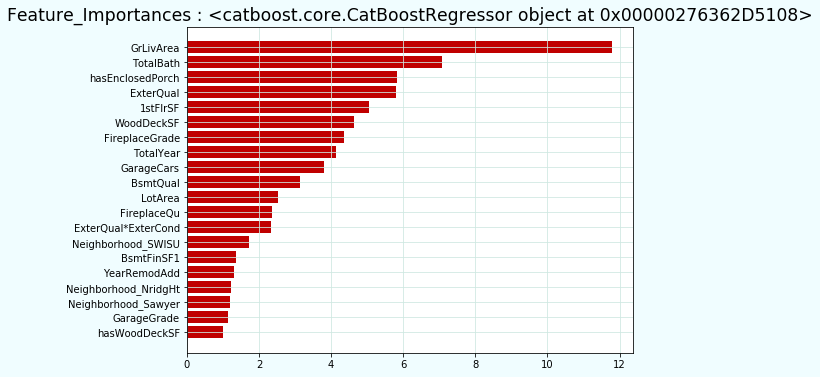

In [474]:
mpotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,data.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split("(")[0]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")

In [475]:
import numpy as np

In [476]:
y_pred = model.predict(x_test)
print("r2_score :", r2_score(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score : 0.9420472111719699
RMSE :  19831.6166324222


In [477]:
y_pred

array([145233.50596703, 407374.38351022, 282022.43248814, 194425.01190037,
       154552.2791621 , 101540.48456067, 204826.97126613, 221579.06213463,
       177149.58520697, 114637.86925262, 135037.84062431, 157957.82515387,
       192132.6494417 , 112375.4797857 , 128683.96106363, 348707.79403924,
       157461.66194793, 154315.19904255, 216501.41831536, 189358.13708274,
       285534.32284249, 120460.07556339,  92934.91815834, 181596.05161995,
       178229.19411643, 180642.93882434, 141971.66210977, 171089.43034547,
       159167.27422367, 310393.09799608, 205615.93791712, 283732.29960507,
       117314.36533708, 212170.82771869, 196491.74953692, 161535.58932515,
       190641.26864753, 143913.88114593, 117259.16745031, 341599.13241411,
       112976.05551158, 141586.41636554, 172726.7954691 , 137567.67226206,
       210387.53975715, 428524.53436553, 321597.05470561, 134656.29725534,
        99570.96263921, 220045.80027016, 118770.01845843, 127872.50481162,
       170217.85289367, 1

In [478]:
pred = model.predict(test)
pred

array([264962.12568144, 151033.46044846, 206385.24262601, ...,
       133661.08091364, 193366.98264227, 121070.75326622])

In [479]:
sub_df = pd.read_csv("sample_submission.csv",index_col="Id")

In [480]:
sub_df["SalePrice"] = pred
sub_df["SalePrice"].head(10)

Id
1752    264962.125681
1753    151033.460448
1754    206385.242626
1755    226160.412810
1756    169362.300761
1757    133008.592895
1758     98907.964787
1759    118933.667694
1760    117908.992385
1761    162112.222725
Name: SalePrice, dtype: float64

In [481]:
sub_df.to_csv("catboost2.csv")